# Building a linear regression model

To build a linear regression model in python, we’ll follow five steps:

* Reading and understanding the data
* Visualizing the data
* Performing simple linear regression
* Residual analysis
* Predictions on the test set


NumPy — used to perform mathematical operations mainly using multi-dimensional arrays.
pandas — used for data manipulation and analysis.
matplotlib — it is a plotting library as a component of NumPy
statsmodels — it is used to explore data, estimate statistical models and perform statistical tests.





![img](../img/1_N1-K-A43_98pYZ27fnupDA%20(1).jpg)

[Adevertising Dataset Kaggle](https://www.kaggle.com/datasets/bumba5341/advertisingcsv)
Adapted from [here](https://towardsdatascience.com/linear-regression-explained-1b36f97b7572)

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## 1. Import the Dataset


In [56]:
data = pd.read_csv("../datasets/Company_data.csv")

## 2. Descriptive Statistics
It is a good practice beforehand to get apprised with the descriptive statistics as it helps us to understand the dataset (eg. — are there any outliers present, etc.)

We can perform descriptive statistics using the following command:

In [57]:
print(data.head())
data.describe()


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


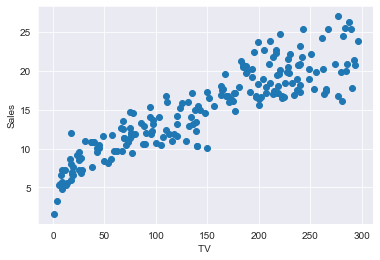

In [58]:
y=data["Sales"]
x1= data ["TV"]
plt.scatter(x1,y)
plt.xlabel("TV ")

plt.ylabel("Sales")
plt.show()

## 3. Create Your First Linear Regression
When performing simple linear regression, the four main components are:

* Dependent Variable — Target variable / will be estimated and predicted
* Independent Variable — Predictor variable / used to estimate and predict
* Slope — Angle of the line / denoted as m
* Intercept — Where function crosses the y-axis / denoted as c

The last two, slope and intercept, are the coefficients/parameters of a linear regression model, so when we calculate the regression model, we’re just calculating these two. In the end, we’re trying to find the best-fit line describing the data, out of an infinite number of lines. To find the slope of a line, we can choose a random part of the line, and divide the change in x by the change in y.

* Δy — Change in y
* Δx — Change in x


In [59]:
Δ𝑦 = ((np.mean(x1) * np.mean(y)) - np.mean(x1*y))
Δ𝑥 = ((np.mean(x1)**2) - np.mean(x1*y))

# Slope
m = Δ𝑦 / Δ𝑥

# Intercept
c = np.mean(y) - m * np.mean(x1)
print(m,c)

-0.021421081523013787 18.280309379847758


## Prediction With Best Fit Line
If we have a new value (x), we can calculate the prediction (y) with the data we already have.


In [60]:

new_x_value = 9
y_predicted = (m * new_x_value) + c
y_predicted

18.087519646140635

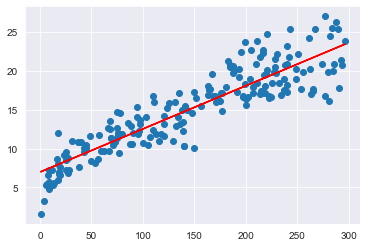

In [64]:
yhat=m*x1+c

plt.scatter(x1,y)
fig=plt.plot(x1,yhat, c="red")
plt.show()

 ## 4. Perform Regression with statsmodels


In [62]:

formula = 'Sales~TV'

#Fit model using Ordinary least squares method
result =ols(formula=formula, data=data[["Sales","TV"]]).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           7.93e-74
Time:                        14:27:42   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It’d create 3 tables and we are mostly interested in the 2nd table which contains the coefficients, p-values, etc.

From the summary table, we can say that the intercept (const) coefficient is 6.97
 and the independent variable coefficient is 0.055 (signifies if independent variable increases by 1 units, the dependent variable increases by 0.055 units)

If the p-value (Prob) of the independent variable/s is greater than 0.050, we say that the variable is not significant and we may drop the variable.
And finally, the R-squared, R² is nothing but the goodness of the fit of the model. In other words, how well our model fitted the observation. R² ranges between 0 and 1. There is no clear universal range for the best R² but, it depends on a case-to-case basis.

Adjusted R² on the other hand, is a modified version of R-squared that has been adjusted for the number of predictors (inputs) in the model. The adjusted R-squared increases when the new independent term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.



5. Plot the Regression Line
To plot the regression line on the graph, simply define the linear regression equation, i.e., y_hat = b0 + (b1*x1)

b0 = coefficient of the bias variable

b1 = coefficient of the input/s variables

and finally, plot the regression line using matplotlib.pyplot() as shown below:

Intercept    6.974821
TV           0.055465
dtype: float64


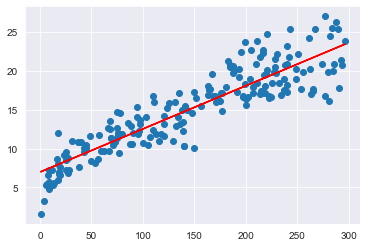

In [63]:
print(result.params)
m=result.params[1]
c=result.params[0]
yhat=m*x1+c

plt.scatter(x1,y)
fig=plt.plot(x1,yhat, c="red")
plt.show()